## US Birth Frequency

This notebook explores the US Birth Frequency Data, which is discussed in several posts on [Andrew Gelman's Blog](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/)

In [1]:
import pandas as pd
import numpy as np

data = '../data/births.csv'
pd.read_csv(data).head()

,Unnamed: 0,date,gender,births
0,0,1969-01-01,F,4046
1,1,1969-01-01,M,4440
2,2,1969-01-02,F,4454
3,3,1969-01-02,M,4548
4,4,1969-01-03,F,4548


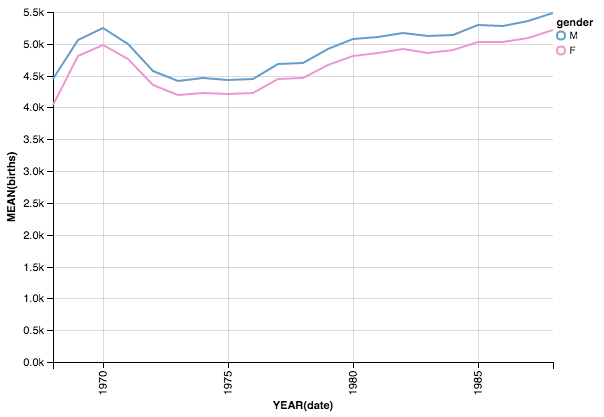

In [2]:
from altair import *

genderscale = Scale(domain=['M', 'F'], range=["#659CCA", "#EA98D2"])

Chart(data).mark_line().encode(
    X('date:T', timeUnit='year'),
    Y('mean(births):Q'),
    Color('gender:N', scale=genderscale)
)

The number of males born in the US is consistently slightly larger than the number of females; NPR had an [interesting discussion](http://www.npr.org/sections/health-shots/2015/03/30/396384911/why-are-more-baby-boys-born-than-girls) of research behind this difference.

Let's look at another view of the data: the births by day of week:

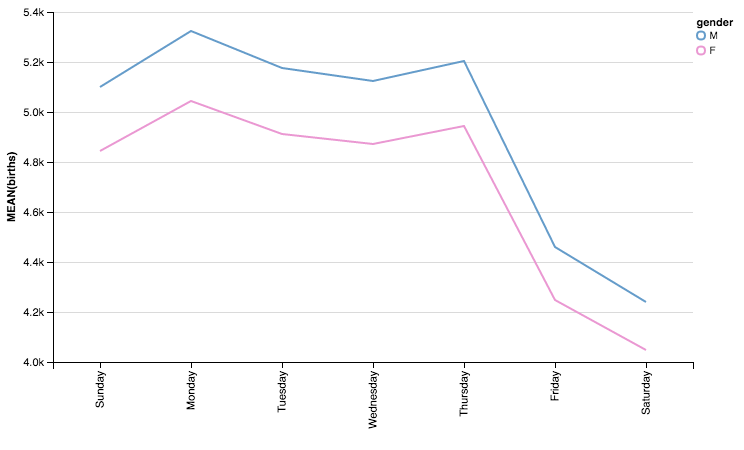

In [3]:
Chart(data).mark_line().encode(
    X('date:T', timeUnit='day', axis=Axis(title=' ')),
    Y('mean(births):Q', scale=Scale(zero=False)),
    Color('gender:N', scale=genderscale)
).configure_scale(bandSize=80)

We see that birthrate drops slightly on weekends!
*NB: there is currently a [bug in Vega-Lite](https://github.com/vega/vega-lite/issues/1556) that causes these day labels to be off by one*.
Similarly, looking by date across years:

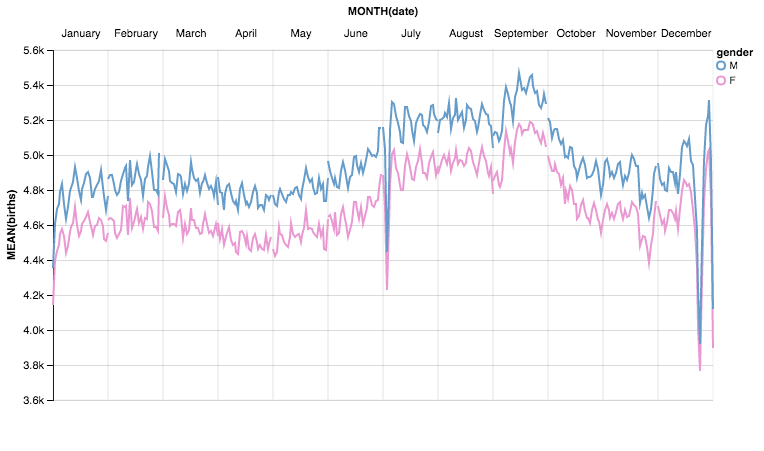

In [4]:
Chart(data).mark_line().encode(
    X('date:T', timeUnit='date',
      axis=Axis(title=' ', grid=False, labels=False,
                axisColor='white', tickColor='white')),
    Y('mean(births):Q', scale=Scale(zero=False)),
    Column('date:T', timeUnit='month', scale=Scale(padding=0)),
    Color('gender:N', scale=genderscale)
).configure_cell(
    width=55
).configure_facet_cell(
    strokeOpacity=0.3
)

Birth rates drop significantly on major US holidays, particularly Independence Day (July 4th), Thanksgiving (late November) Christmas (December 25th) and New Years Eve/Day (December 31st - January 1st). This is about a 20% effect at maximum, and is probably due to the prevalence of scheduled/induced births. For more discussion of these effects, see [Andrew Gelman's Blog](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/).